In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
352,LP002141,Male,Yes,3+,Graduate,No,2666,2083.0,95.0,360.0,1.0,Rural,Y
553,LP002788,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban,N
290,LP001936,Male,Yes,0,Graduate,No,3075,2416.0,139.0,360.0,1.0,Rural,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
396,LP002277,Female,No,0,Graduate,No,3180,0.0,71.0,360.0,0.0,Urban,N


In [ ]:
df.drop(columns=["Loan_Amount_Term","Credit_History","Property_Area","Loan_Status","Loan_ID","Gender"],inplace=True)

In [ ]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount
0,No,0,Graduate,No,5849,0.0,NaN
1,Yes,1,Graduate,No,4583,1508.0,128.0
2,Yes,0,Graduate,Yes,3000,0.0,66.0
3,Yes,0,Not Graduate,No,2583,2358.0,120.0
4,No,0,Graduate,No,6000,0.0,141.0


In [ ]:
df.isnull().sum()

,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22


In [ ]:
df.shape

(614, 7)

In [ ]:
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())


In [ ]:
df.isnull().sum()

,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount
0,No,0,Graduate,No,5849,0.0,128.0
1,Yes,1,Graduate,No,4583,1508.0,128.0
2,Yes,0,Graduate,Yes,3000,0.0,66.0
3,Yes,0,Not Graduate,No,2583,2358.0,120.0
4,No,0,Graduate,No,6000,0.0,141.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            613 non-null    object 
 1   Dependents         613 non-null    object 
 2   Education          613 non-null    object 
 3   Self_Employed      613 non-null    object 
 4   ApplicantIncome    613 non-null    int64  
 5   CoapplicantIncome  613 non-null    float64
 6   LoanAmount         613 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 38.3+ KB


In [ ]:
df.shape

(613, 7)

In [ ]:
# Step 1: Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Step 2: Create encoder instance
le = LabelEncoder()

# Step 3: Encode categorical columns
categorical_cols = ["Married", "Education", "Self_Employed"]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Verify encoding
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")


Married unique values: [0 1]
Education unique values: [0 1]
Self_Employed unique values: [0 1]


In [ ]:
# Step 1: Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Step 2: Create encoder instance
le = LabelEncoder()

# Step 3: Prepare Dependents column
# Replace "3+" with 3 and convert to string (LabelEncoder expects string/object type)
df["Dependents"] = df["Dependents"].replace("3+", 3).astype(str)

# Step 4: Apply LabelEncoder on Dependents only
df["Dependents"] = le.fit_transform(df["Dependents"])

# Step 5: Verify encoding
print(f"Dependents unique values after encoding: {df['Dependents'].unique()}")


Dependents unique values after encoding: [0 1 2 3]


In [ ]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0,0,0,0,5849,0.0,128.0
1,1,1,0,0,4583,1508.0,128.0
2,1,0,0,1,3000,0.0,66.0
3,1,0,1,0,2583,2358.0,120.0
4,0,0,0,0,6000,0.0,141.0


Dataset Shape: (613, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            613 non-null    int64  
 1   Dependents         613 non-null    int64  
 2   Education          613 non-null    int64  
 3   Self_Employed      613 non-null    int64  
 4   ApplicantIncome    613 non-null    int64  
 5   CoapplicantIncome  613 non-null    float64
 6   LoanAmount         613 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 38.3 KB

Data Info:
 None

Missing Values:
 Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

Summary Statistics:
           Married  Dependents   Education  Self_Employed  ApplicantIncome  \
count  613.000000  613.000000  613.000000     613.000000       613.000000   
mean    

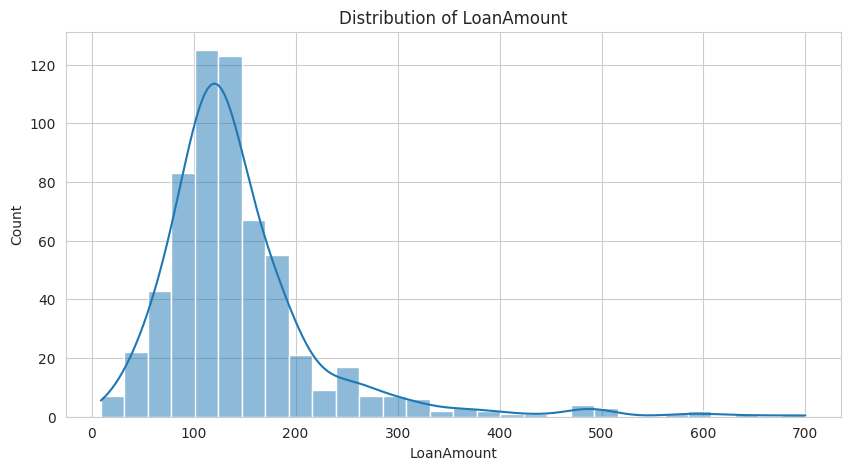

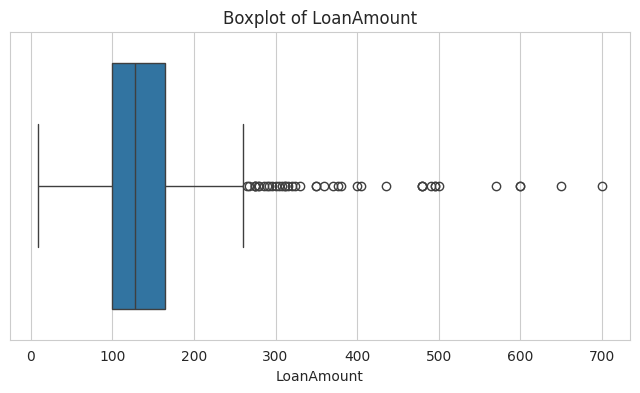

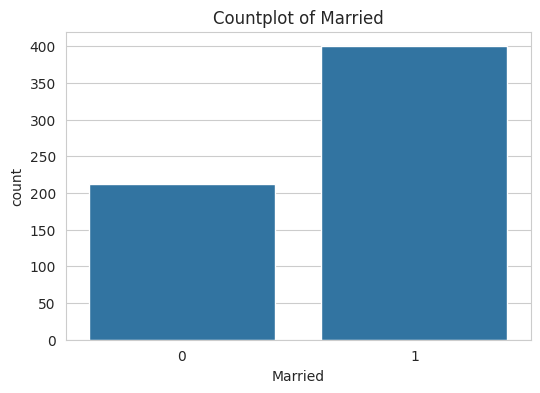

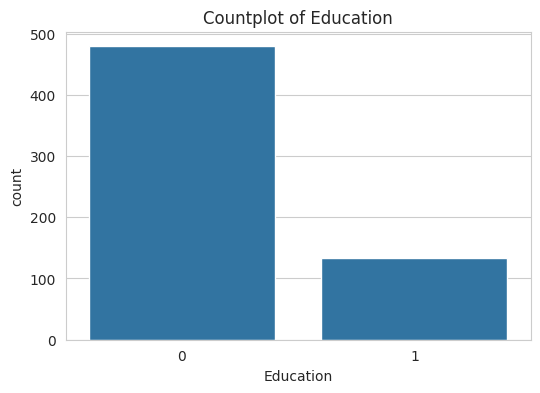

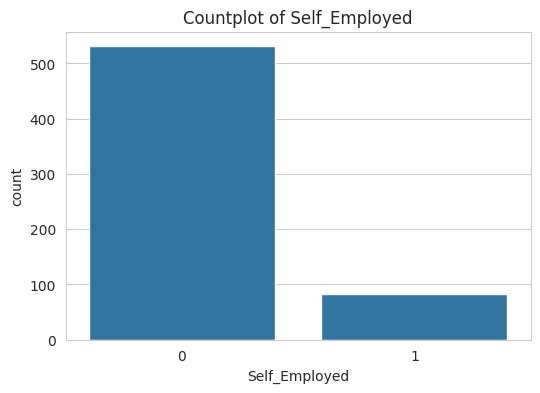

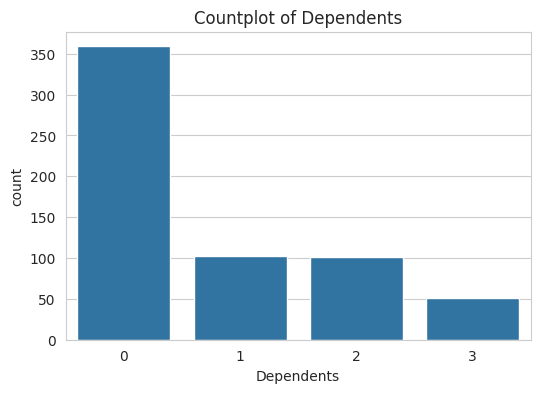

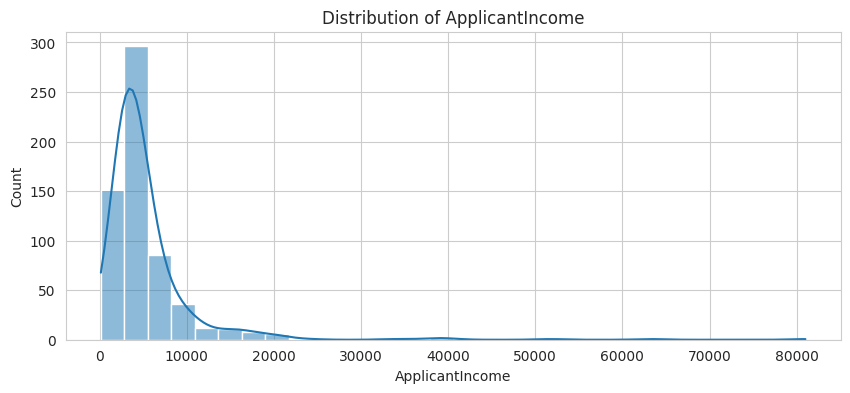

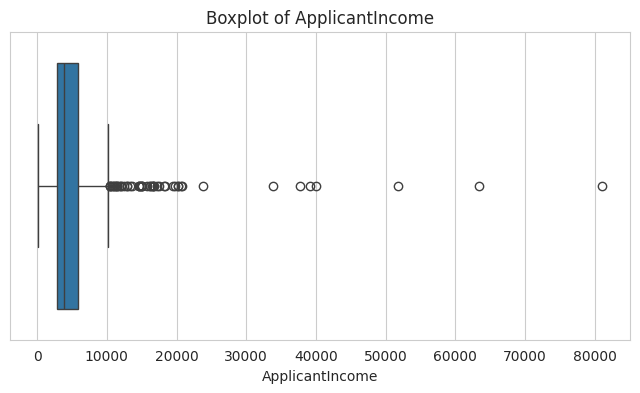

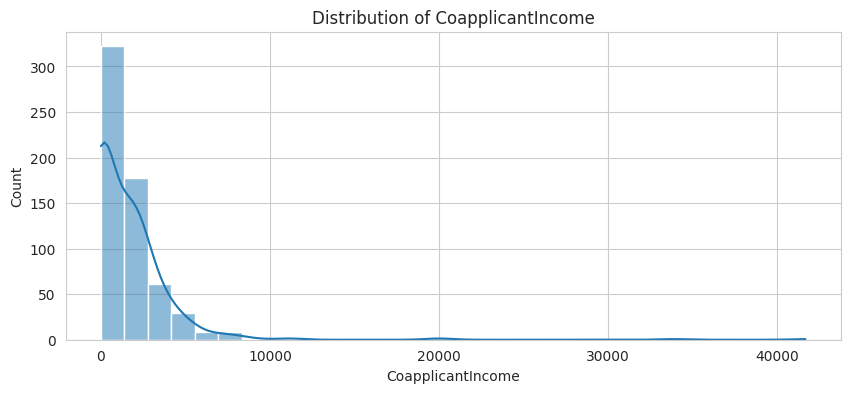

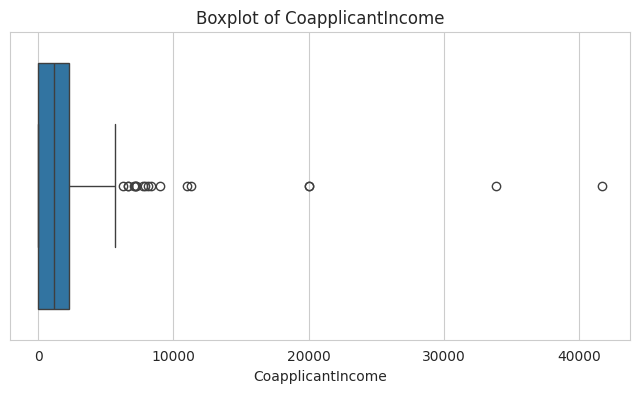

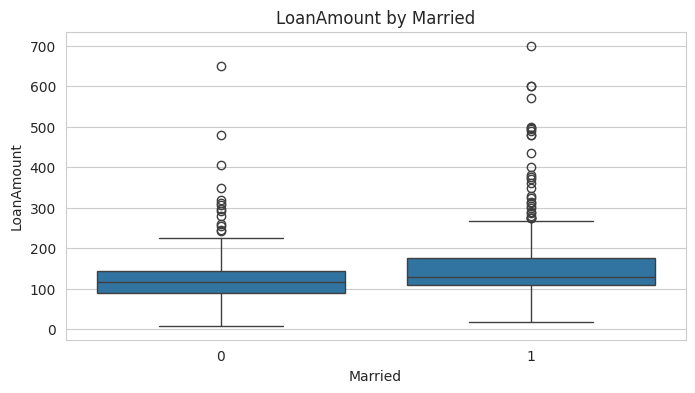

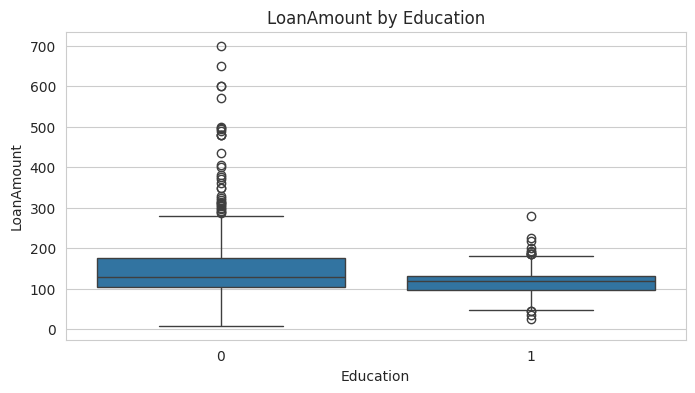

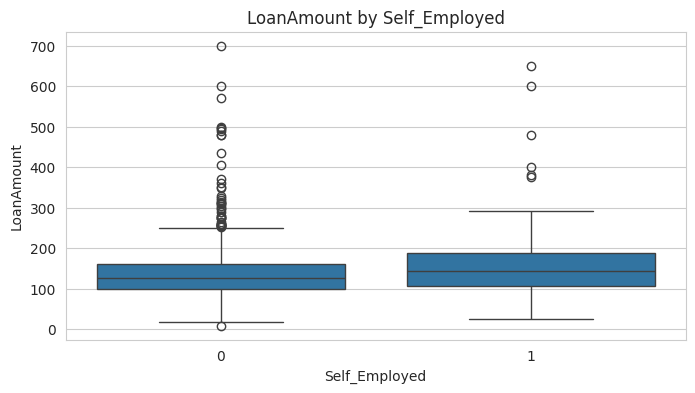

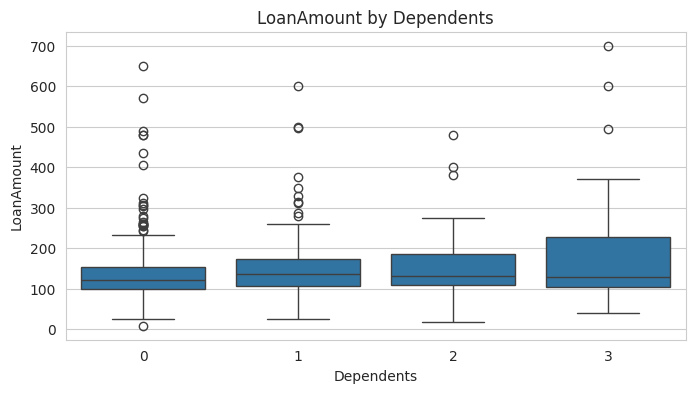

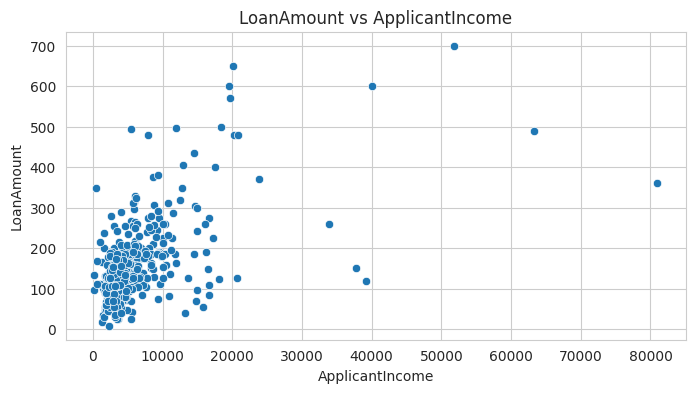

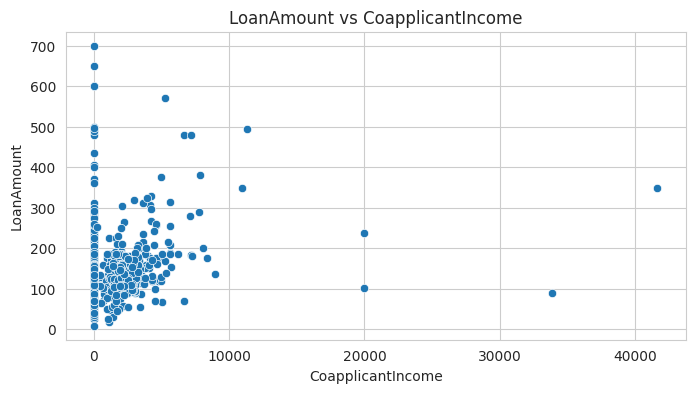

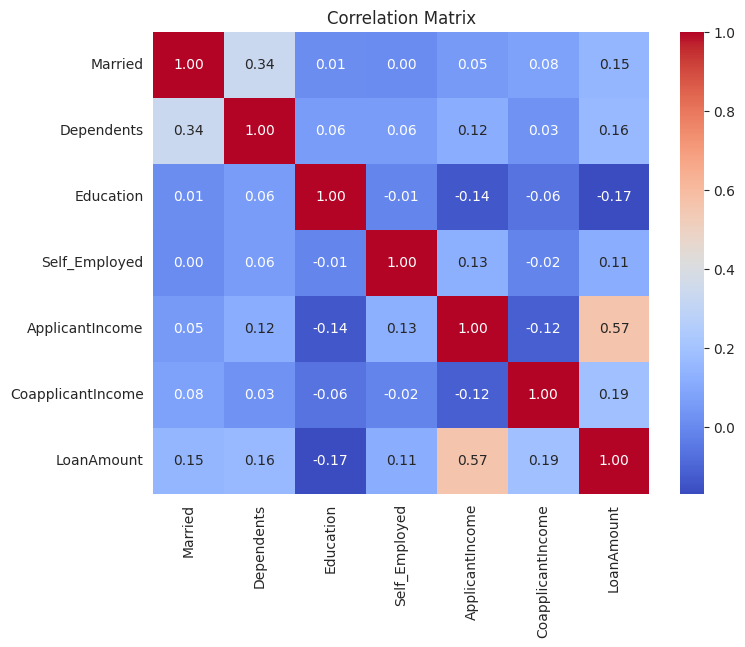

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Better plots
sns.set_style('whitegrid')

# Step 2: Load dataset (assuming df is already loaded)
# df = pd.read_csv("loan_data.csv")

# Step 3: Basic overview
print("Dataset Shape:", df.shape)
print("\nData Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Step 4: Target Variable Analysis (LoanAmount)
plt.figure(figsize=(10,5))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Distribution of LoanAmount")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['LoanAmount'])
plt.title("Boxplot of LoanAmount")
plt.show()

# Step 5: Categorical Features Analysis
categorical_cols = ["Married", "Education", "Self_Employed", "Dependents"]
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

# Step 6: Numerical Features Analysis
numerical_cols = ["ApplicantIncome", "CoapplicantIncome"]
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 7: Relationship with Target
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df['LoanAmount'])
    plt.title(f"LoanAmount by {col}")
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df[col], y=df['LoanAmount'])
    plt.title(f"LoanAmount vs {col}")
    plt.show()

# Step 8: Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
x=df.drop("LoanAmount",axis=1)
y=df["LoanAmount"]

In [ ]:
# Step 1: Import required library
from sklearn.model_selection import train_test_split

# Step 2: Define Features (X) and Target (y)
# Target variable
y = df['LoanAmount']

# Features (numeric + encoded categorical columns)
X = df.drop(columns=['LoanAmount'])

# Step 3: Apply Train-Test Split
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (490, 6)
X_test shape: (123, 6)
y_train shape: (490,)
y_test shape: (123,)


In [ ]:
X

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome
0,0,0,0,0,5849,0.0
1,1,1,0,0,4583,1508.0
2,1,0,0,1,3000,0.0
3,1,0,1,0,2583,2358.0
4,0,0,0,0,6000,0.0
...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0
610,1,3,0,0,4106,0.0
611,1,1,0,0,8072,240.0
612,1,2,0,0,7583,0.0


In [ ]:
y

,LoanAmount
0,128.0
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [ ]:
# Step 1: Import Linear Regression
from sklearn.linear_model import LinearRegression

# Step 2: Create model instance
lr = LinearRegression()

# Step 3: Train model
model = lr.fit(X_train, y_train)

# Step 4: Make predictions on test set
pred1 = model.predict(X_test)

# Step 5: Optional - view first 5 predictions
print(pred1[:5])


[232.04308593 144.5801911  107.58927852 113.08588966 145.50875987]


In [ ]:
# Compare actual vs predicted values
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": pred1
})

# Show first 10 rows
print(comparison.head(10))


   Actual   Predicted
0    55.0  232.043086
1   151.0  144.580191
2    74.0  107.589279
3   113.0  113.085890
4    40.0  145.508760
5   158.0  149.241585
6    42.0  125.424354
7    67.0  125.522687
8    93.0  108.167810
9    73.0  133.460278


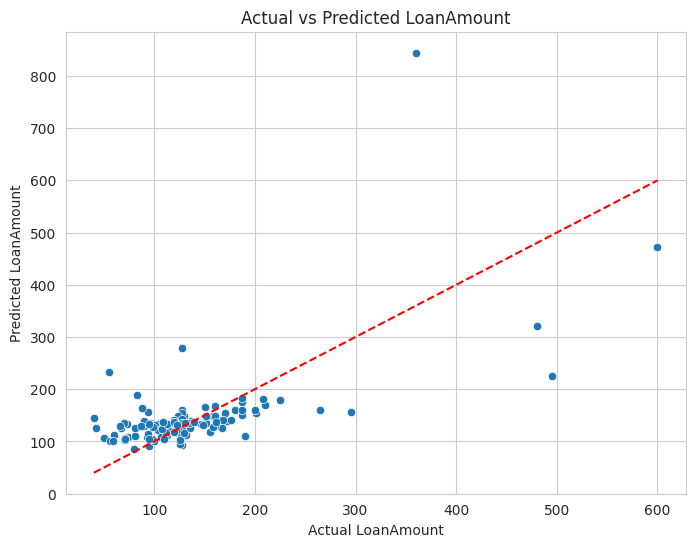

In [ ]:


plt.figure(figsize=(8,6))
sns.scatterplot(x=comparison["Actual"], y=comparison["Predicted"])
plt.xlabel("Actual LoanAmount")
plt.ylabel("Predicted LoanAmount")
plt.title("Actual vs Predicted LoanAmount")
plt.plot([comparison["Actual"].min(), comparison["Actual"].max()],
         [comparison["Actual"].min(), comparison["Actual"].max()],
         color='red', linestyle='--')  # perfect prediction line
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# MAE: Mean Absolute Error
mae = mean_absolute_error(y_test, pred1)


# MSE
mse = mean_squared_error(y_test, pred1)

# RMSE manually
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, pred1)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 37.298333151704
Mean Squared Error (MSE): 4564.948719511571
Root Mean Squared Error (RMSE): 67.56440423411999
R² Score: 0.2566047022932685


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
# Create Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Train model
dt_model = dt.fit(X_train, y_train)

# Predict on test data
dt_pred = dt_model.predict(X_test)

# Evaluate
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Regressor:")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R² Score:", dt_r2)


Decision Tree Regressor:
MAE: 47.24661246612466
MSE: 6009.313459801264
RMSE: 77.5197617372581
R² Score: 0.021391992999209353


In [ ]:
# Create Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model = rf.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandom Forest Regressor:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)



Random Forest Regressor:
MAE: 33.52974003097174
MSE: 3820.5627739175693
RMSE: 61.81070112785948
R² Score: 0.377826877094121


In [ ]:
import joblib

joblib.dump(rf_model, "loan_model.pkl")


['loan_model.pkl']

In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("loan_model.pkl")

st.title("🏦 Loan Amount Prediction App")

st.write("Enter applicant details to predict loan amount")

# Inputs
married = st.selectbox("Married", [0, 1])   # 0 = No, 1 = Yes
education = st.selectbox("Education", [0, 1])  # 0 = Not Graduate, 1 = Graduate
self_employed = st.selectbox("Self Employed", [0, 1])
dependents = st.selectbox("Dependents", [0, 1, 2, 3])
total_income = st.number_input("Total Income", min_value=0)

# Prediction
if st.button("Predict Loan Amount"):
    input_data = np.array([[married, education, self_employed, dependents, total_income]])
    prediction = model.predict(input_data)
    st.success(f"Predicted Loan Amount: {round(prediction[0], 2)}")


2026-01-02 05:16:42.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 05:16:42.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 05:16:42.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 05:16:42.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 05:16:42.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 05:16:42.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 05:16:42.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 05:16:42.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install streamlit cloudflared joblib


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.4 MB/s eta 0:00:00
  Created wheel for cloudflared: filename=cloudflared-1.0.0.2-py3-none-any.whl size=2983 sha256=813bc7d927a85064cf631b482f31510422ec848be020f542e7d3b638748adccf
  Stored in directory: /root/.cache/pip/wheels/5b/ec/09/c3bcd3470be046ec77a9c0cb9d8bb6ceed49c831460878ab0a
Successfully built cloudflared


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("loan_model.pkl")

st.title("🏦 Loan Amount Prediction App")

married = st.selectbox("Married", [0, 1])
education = st.selectbox("Education", [0, 1])
self_employed = st.selectbox("Self Employed", [0, 1])
dependents = st.selectbox("Dependents", [0, 1, 2, 3])
total_income = st.number_input("Total Income", min_value=0)

if st.button("Predict Loan Amount"):
    input_data = np.array([[married, education, self_employed, dependents, total_income]])
    prediction = model.predict(input_data)
    st.success(f"Predicted Loan Amount: {round(prediction[0], 2)}")



Writing app.py
